# Classifiers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "./EP_datasets/TrafficLabelling_/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    low_memory=False,
    encoding="cp1252",
)
print(f"#rows={len(df)} #columns={len(df.columns)}")

# pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
# Print some info and plots to get a feeling about the dataset
print(df.dtypes)

#rows=225745 #columns=85
Flow ID               object
 Source IP            object
 Source Port           int64
 Destination IP       object
 Destination Port      int64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max              int64
 Idle Min              int64
 Label                object
Length: 85, dtype: object


In [2]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# Check if we have any '?' in df values
print(df.columns[df.isin(["?"]).any()])
# Check if we have any NaN in df values
print(df.columns[df.isnull().any()])

Index([], dtype='object')
Index(['Flow Bytes/s'], dtype='object')


In [4]:
print(df[df.isnull().any(axis=1)])

                                          Flow ID      Source IP  \
6796       192.168.10.16-198.54.12.145-36812-80-6  198.54.12.145   
14739   192.168.10.25-192.168.10.50-53581-37575-6  192.168.10.50   
15047          192.168.10.17-1.1.70.73-48283-80-6  192.168.10.17   
209728  192.168.10.17-192.168.10.50-39026-18467-6  192.168.10.17   

         Source Port  Destination IP   Destination Port   Protocol  \
6796              80   192.168.10.16              36812          6   
14739          37575   192.168.10.25              53581          6   
15047          48283       1.1.70.73                 80          6   
209728         39026   192.168.10.50              18467          6   

            Timestamp   Flow Duration   Total Fwd Packets  \
6796    7/7/2017 3:35               0                   2   
14739   7/7/2017 3:46               0                   1   
15047   7/7/2017 3:48               0                   2   
209728  7/7/2017 4:34               0                   2   

  

In [5]:
# replace NaN with infinity
df["Flow Bytes/s"] = df["Flow Bytes/s"].fillna(np.inf)
print(df.columns[df.isnull().any()])

Index([], dtype='object')


In [6]:
# check for values of infinity
print(df[np.isinf(df["Flow Bytes/s"])])

                                          Flow ID       Source IP  \
65         185.86.137.17-192.168.10.5-443-55043-6   185.86.137.17   
1767     149.174.66.134-192.168.10.16-443-60018-6  149.174.66.134   
1890      172.217.12.142-192.168.10.14-80-57855-6   192.168.10.14   
3375        192.168.10.5-54.76.211.99-55251-443-6    192.168.10.5   
6796       192.168.10.16-198.54.12.145-36812-80-6   198.54.12.145   
8057      192.168.10.3-192.168.10.19-3268-35382-6    192.168.10.3   
8405        192.168.10.5-192.168.10.50-55421-21-6   192.168.10.50   
13313       192.168.10.9-52.84.145.229-9242-443-6   52.84.145.229   
13716      192.168.10.3-192.168.10.16-389-50546-6   192.168.10.16   
14739   192.168.10.25-192.168.10.50-53581-37575-6   192.168.10.50   
15047          192.168.10.17-1.1.70.73-48283-80-6   192.168.10.17   
18253     192.168.10.14-52.84.145.128-57919-443-6   52.84.145.128   
33330    151.101.193.34-192.168.10.16-443-59646-6  151.101.193.34   
55551         172.16.0.1-192.168.1

In [7]:
# remove columns with infinity
df = df[df["Flow Bytes/s"] < np.inf]

In [8]:
df.shape

(225711, 85)

In [9]:
# check for values of infinity
print(df[np.isinf(df["Flow Bytes/s"])])

Empty DataFrame
Columns: [Flow ID,  Source IP,  Source Port,  Destination IP,  Destination Port,  Protocol,  Timestamp,  Flow Duration,  Total Fwd Packets,  Total Backward Packets, Total Length of Fwd Packets,  Total Length of Bwd Packets,  Fwd Packet Length Max,  Fwd Packet Length Min,  Fwd Packet Length Mean,  Fwd Packet Length Std, Bwd Packet Length Max,  Bwd Packet Length Min,  Bwd Packet Length Mean,  Bwd Packet Length Std, Flow Bytes/s,  Flow Packets/s,  Flow IAT Mean,  Flow IAT Std,  Flow IAT Max,  Flow IAT Min, Fwd IAT Total,  Fwd IAT Mean,  Fwd IAT Std,  Fwd IAT Max,  Fwd IAT Min, Bwd IAT Total,  Bwd IAT Mean,  Bwd IAT Std,  Bwd IAT Max,  Bwd IAT Min, Fwd PSH Flags,  Bwd PSH Flags,  Fwd URG Flags,  Bwd URG Flags,  Fwd Header Length,  Bwd Header Length, Fwd Packets/s,  Bwd Packets/s,  Min Packet Length,  Max Packet Length,  Packet Length Mean,  Packet Length Std,  Packet Length Variance, FIN Flag Count,  SYN Flag Count,  RST Flag Count,  PSH Flag Count,  ACK Flag Count,  URG Fl

In [10]:
# Check unique levels for objects
for col in df.columns:
    if df[col].dtype == object:
        print(col, df[col].unique())

Flow ID ['192.168.10.5-104.16.207.165-54865-443-6'
 '192.168.10.5-104.16.28.216-55054-80-6'
 '192.168.10.5-104.16.28.216-55055-80-6' ...
 '192.168.10.3-192.168.10.8-445-10414-6'
 '192.168.10.3-192.168.10.8-53-51617-17'
 '192.168.10.8-72.21.81.253-10398-443-6']
 Source IP ['104.16.207.165' '104.16.28.216' '104.17.241.25' ... '52.84.145.166'
 '52.84.145.38' '8.41.222.187']


 Destination IP ['192.168.10.5' '192.168.10.16' '192.168.10.8' ... '52.84.145.230'
 '23.21.84.138' '192.229.173.28']
 Timestamp ['7/7/2017 3:30' '7/7/2017 3:31' '7/7/2017 3:32' '7/7/2017 3:33'
 '7/7/2017 3:34' '7/7/2017 3:35' '7/7/2017 3:36' '7/7/2017 3:37'
 '7/7/2017 3:38' '7/7/2017 3:39' '7/7/2017 3:40' '7/7/2017 3:41'
 '7/7/2017 3:42' '7/7/2017 3:43' '7/7/2017 3:44' '7/7/2017 3:45'
 '7/7/2017 3:46' '7/7/2017 3:47' '7/7/2017 3:48' '7/7/2017 3:49'
 '7/7/2017 3:50' '7/7/2017 3:51' '7/7/2017 3:52' '7/7/2017 3:53'
 '7/7/2017 3:54' '7/7/2017 3:55' '7/7/2017 3:56' '7/7/2017 3:57'
 '7/7/2017 3:58' '7/7/2017 3:59' '7/7/2017 4:00' '7/7/2017 4:01'
 '7/7/2017 4:02' '7/7/2017 4:03' '7/7/2017 4:04' '7/7/2017 4:05'
 '7/7/2017 4:06' '7/7/2017 4:07' '7/7/2017 4:08' '7/7/2017 4:09'
 '7/7/2017 4:10' '7/7/2017 4:11' '7/7/2017 4:12' '7/7/2017 4:13'
 '7/7/2017 4:14' '7/7/2017 4:15' '7/7/2017 4:16' '7/7/2017 4:17'
 '7/7/2017 4:18' '7/7/2017 4:19' '7/7/2017 4:20' '7/7/2017 4:21'
 '7/7/2017 4:22' '7/7/2017 

<Axes: >

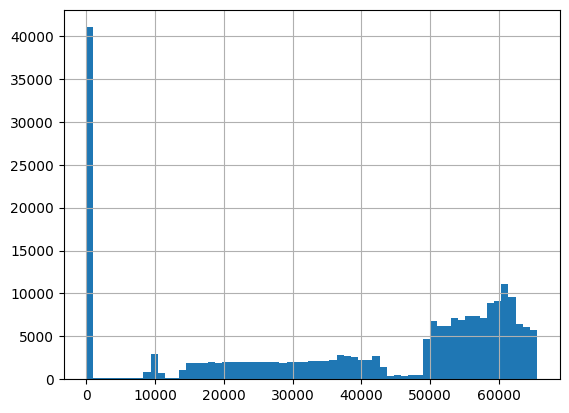

In [11]:
df[" Source Port"].hist(bins=63)

<Axes: >

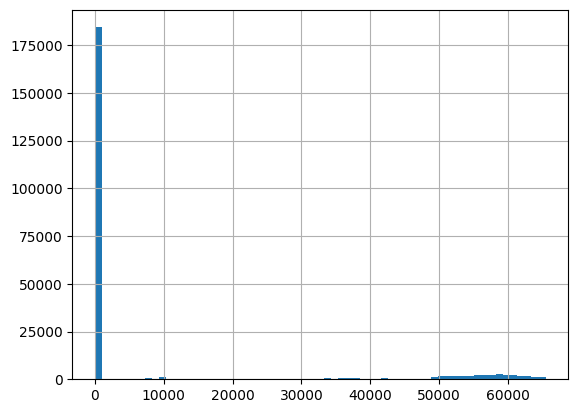

In [12]:
df[" Destination Port"].hist(bins=63)

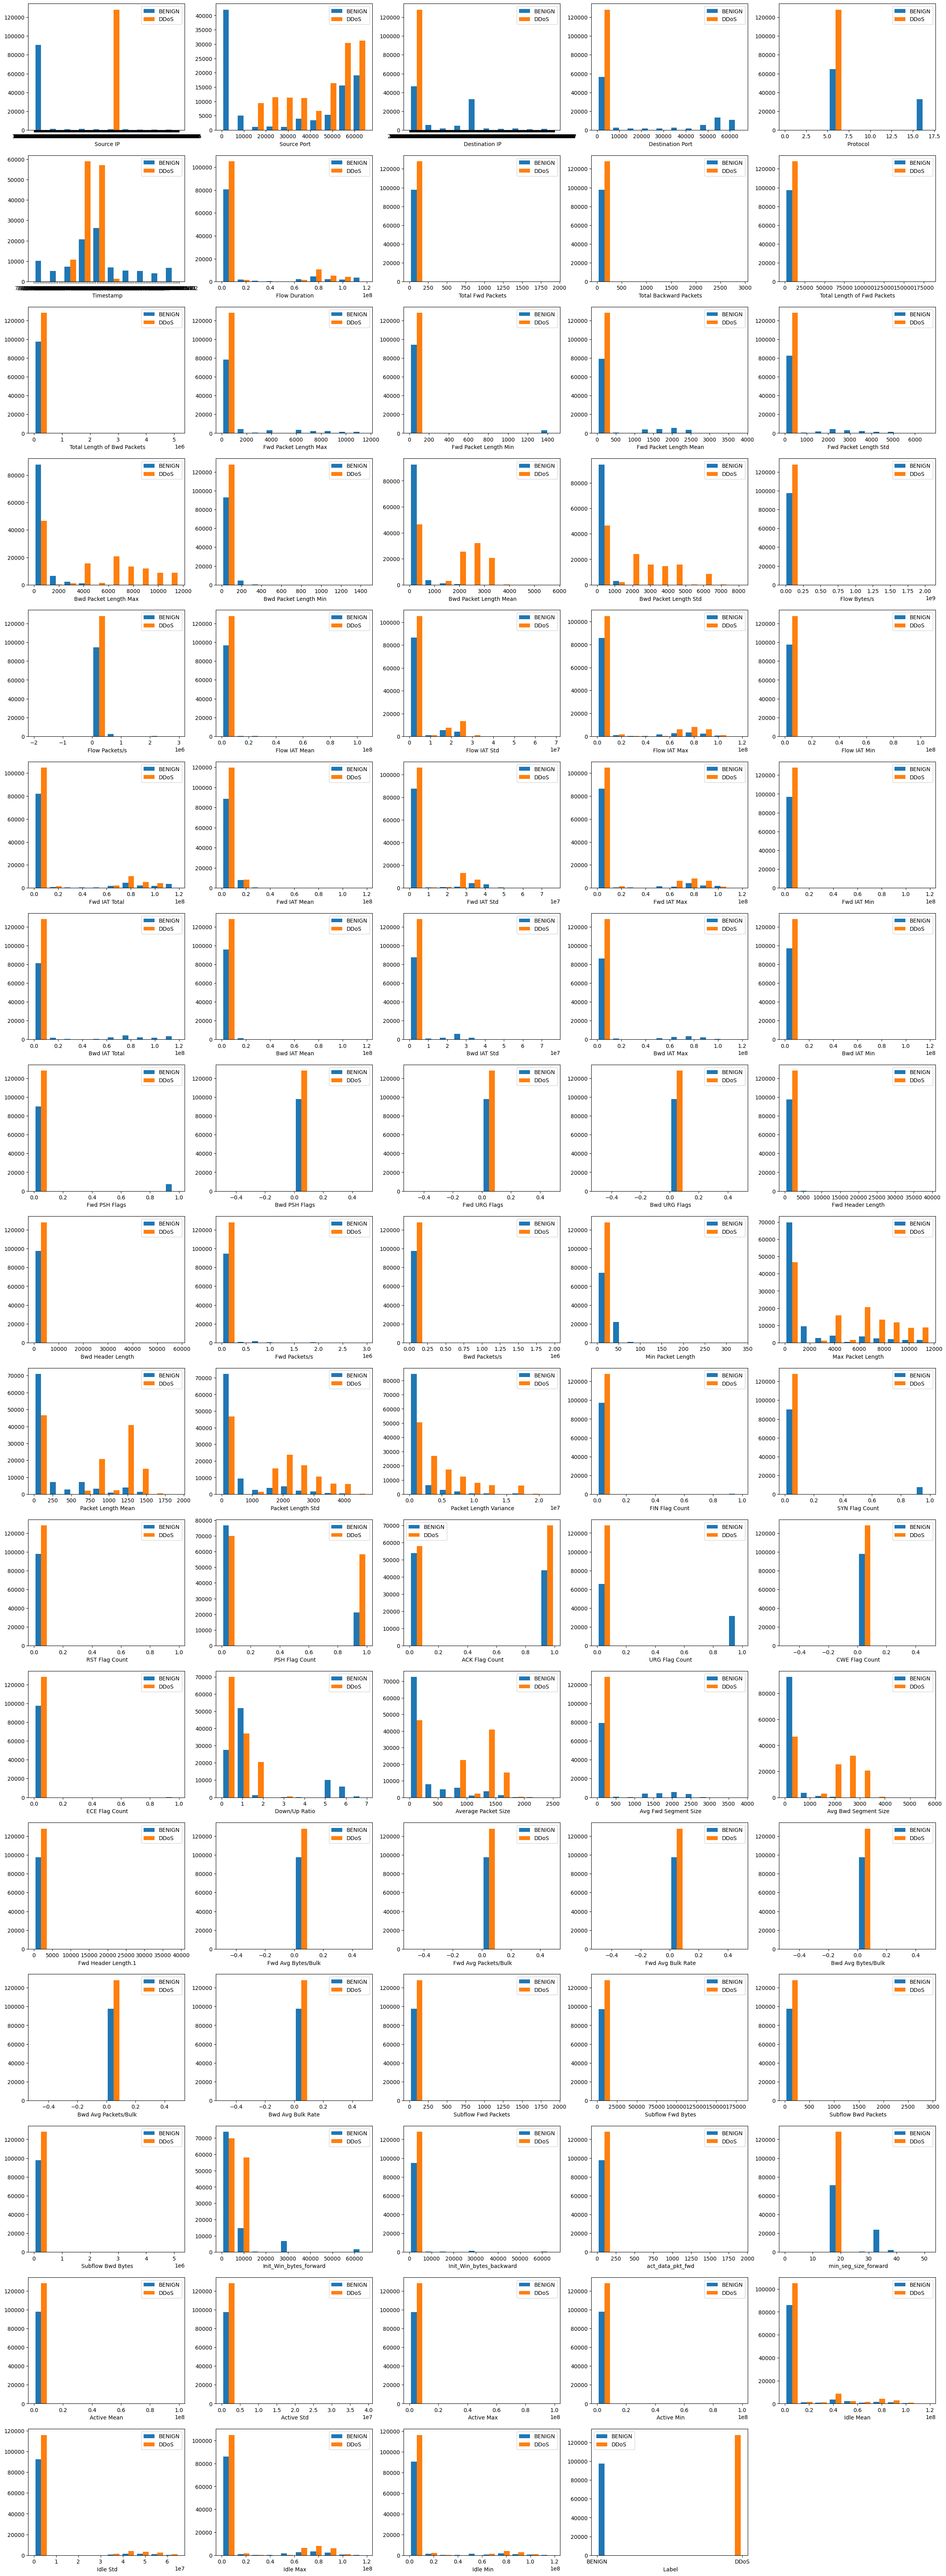

In [13]:
def plt_var(_col):
    plt.hist(
        [df[df[" Label"] == "BENIGN"][_col], df[df[" Label"] == "DDoS"][_col]],
        label=["BENIGN", "DDoS"],
    )
    plt.xlabel(_col)
    plt.legend()


plt.figure(figsize=(30, 100))

for i in range(len(df.columns) - 1):
    plt.subplot(20, 5, i + 1)
    plt_var(df.columns[i + 1])

In [14]:
# set ports greater than 1024 to -1 to represent other ports
pd.set_option("display.max_columns", None)
df_filt = df.copy()
df_filt.loc[df_filt[" Source Port"] > 1024, " Source Port"] = -1
df_filt.loc[df_filt[" Destination Port"] > 1024, " Destination Port"] = -1
df_filt.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,-1,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,-1,6,7/7/2017 3:30,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,-1,6,7/7/2017 3:30,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,-1,6,7/7/2017 3:30,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,-1,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [15]:
# one hot encode values in data
def encode_onehot(_df, f):
    _df2 = (
        pd.get_dummies(_df[f], prefix="", prefix_sep="")
        .groupby(level=0, axis=1)
        .max()
        .add_prefix(f + " - ")
    )
    df3 = pd.concat([_df, _df2], axis=1)
    df3 = df3.drop([f], axis=1)
    return df3

In [16]:
# set X
dfX = df_filt.loc[
    :,
    [
        " Source Port",
        " Destination Port",
        " Bwd Packet Length Std",
        " Packet Length Std",
        " Average Packet Size",
        " Avg Bwd Segment Size",
    ],
]
dfX

,Source Port,Destination Port,Bwd Packet Length Std,Packet Length Std,Average Packet Size,Avg Bwd Segment Size
0,443,-1,0.0,0.0,9.0,0.0
1,80,-1,0.0,0.0,9.0,6.0
2,80,-1,0.0,0.0,9.0,6.0
3,443,-1,0.0,0.0,9.0,6.0
4,443,-1,0.0,0.0,9.0,0.0
...,...,...,...,...,...,...
225740,80,-1,0.0,0.0,9.0,6.0
225741,80,-1,0.0,0.0,9.0,6.0
225742,80,-1,0.0,0.0,9.0,6.0
225743,80,-1,0.0,0.0,9.0,0.0


In [17]:
dfX_o = encode_onehot(dfX, " Source Port")
dfX_o = encode_onehot(dfX_o, " Destination Port")
dfX_o

/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")
/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")


,Bwd Packet Length Std,Packet Length Std,Average Packet Size,Avg Bwd Segment Size,Source Port - -1,Source Port - 0,Source Port - 1024,Source Port - 123,Source Port - 135,Source Port - 137,Source Port - 138,Source Port - 139,Source Port - 21,Source Port - 22,Source Port - 389,Source Port - 42,Source Port - 443,Source Port - 445,Source Port - 465,Source Port - 53,Source Port - 80,Source Port - 88,Destination Port - -1,Destination Port - 0,Destination Port - 123,Destination Port - 135,Destination Port - 137,Destination Port - 138,Destination Port - 139,Destination Port - 21,Destination Port - 22,Destination Port - 389,Destination Port - 42,Destination Port - 443,Destination Port - 445,Destination Port - 465,Destination Port - 53,Destination Port - 80,Destination Port - 88
0,0.0,0.0,9.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.0,0.0,9.0,6.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,9.0,6.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,9.0,6.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,9.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,0.0,0.0,9.0,6.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
225741,0.0,0.0,9.0,6.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
225742,0.0,0.0,9.0,6.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
225743,0.0,0.0,9.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


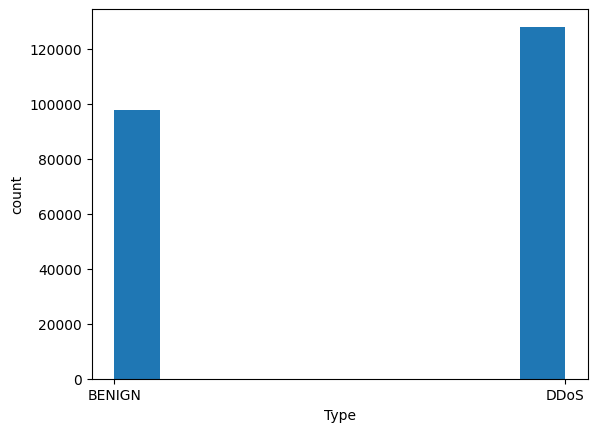

In [18]:
from sklearn.preprocessing import LabelEncoder

# set X and y

X = dfX_o.values

y_org = df.loc[:, df.columns == " Label"].values.ravel()

# one hot encode labels
le = LabelEncoder()
y = le.fit_transform(y_org)

plt.hist(y)
plt.xticks(np.unique(y), le.classes_)
plt.xlabel("Type")
plt.ylabel("count")
plt.show()

In [19]:
print(X.shape)
print(y.shape)

(225711, 39)
(225711,)


In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# 10-fold CV evaluation of a classifier


def eval_classifier(_clf, _X, _y):
    acc = []
    splits = 10
    kf = StratifiedKFold(n_splits=splits, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        acc += [accuracy_score(_y[test_index], y_pred)]
    return np.array(acc)

In [21]:
from sklearn.ensemble import RandomForestClassifier

acc = eval_classifier(
    RandomForestClassifier(
        criterion="gini",
        n_estimators=10,
        max_depth=5,
        min_samples_split=2,
        random_state=1,
    ),
    X,
    y,
)
print(f"Random Forest CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Random Forest CV accuracy=0.98 ±0.007


In [22]:
from sklearn.naive_bayes import GaussianNB

acc = eval_classifier(GaussianNB(), X, y)
print(f"Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Naive Bayes CV accuracy=0.96 ±0.018


In [23]:
from sklearn.neural_network import MLPClassifier

acc = eval_classifier(
    MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1), X, y
)
print(f"Neural Network CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Neural Network CV accuracy=0.91 ±0.128


In [24]:
def dataset_eval(file_name):
    df = pd.read_csv(
        "./EP_datasets/TrafficLabelling_/" + file_name,
        low_memory=False,
        encoding="cp1252",
    )

    # replace NaN with infinity
    df["Flow Bytes/s"] = df["Flow Bytes/s"].fillna(np.inf)
    df = df[df["Flow Bytes/s"] < np.inf]

    # set ports greater than 1024 to -1 to represent other ports
    pd.set_option("display.max_columns", None)
    df_filt = df.copy()
    df_filt.loc[df_filt[" Source Port"] > 1024, " Source Port"] = -1
    df_filt.loc[df_filt[" Destination Port"] > 1024, " Destination Port"] = -1

    # set X and y
    dfX = df_filt.loc[
        :,
        [
            " Source Port",
            " Destination Port",
            " Bwd Packet Length Std",
            " Packet Length Std",
            " Average Packet Size",
            " Avg Bwd Segment Size",
        ],
    ]

    dfX_o = encode_onehot(dfX, " Source Port")
    dfX_o = encode_onehot(dfX_o, " Destination Port")

    X = dfX_o.values

    y_org = df.loc[:, df.columns == " Label"].values.ravel()

    le = LabelEncoder()
    y = le.fit_transform(y_org)

    acc = eval_classifier(
        RandomForestClassifier(
            criterion="gini",
            n_estimators=10,
            max_depth=5,
            min_samples_split=2,
            random_state=1,
        ),
        X,
        y,
    )
    print(f"Random Forest CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

In [25]:
dataset_eval("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")
/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")


Random Forest CV accuracy=0.95 ±0.027


In [26]:
dataset_eval("Friday-WorkingHours-Morning.pcap_ISCX.csv")

/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")
/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")


Random Forest CV accuracy=0.99 ±0.002


In [27]:
dataset_eval("Monday-WorkingHours.pcap_ISCX.csv")

/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")
/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")


Random Forest CV accuracy=1.00 ±0.000


In [28]:
dataset_eval("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")
/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")


Random Forest CV accuracy=1.00 ±0.000


In [29]:
dataset_eval("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")
/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")


Random Forest CV accuracy=0.99 ±0.000


In [30]:
dataset_eval("Tuesday-WorkingHours.pcap_ISCX.csv")

/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")
/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")


Random Forest CV accuracy=1.00 ±0.002


In [31]:
dataset_eval("Wednesday-workingHours.pcap_ISCX.csv")

/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")
/tmp/ipykernel_34011/2664773589.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.get_dummies(_df[f], prefix="", prefix_sep="")


Random Forest CV accuracy=0.94 ±0.018
